# Viscous flow

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   4th of March 2024

## Exercise 9: Asthenospheric flow underneath a plate

During the lectures on viscous flow dynamics, one of the exercises (Example 2) showed that the flow down a conduit is the result of gravity working against viscous resistance. In such a case the dynamic balance equation took the form

$$ \mu \frac{\delta^2 v_y}{\delta x^2} + \rho g = 0$$

and the envelope of the resulting flow is a parabola (i.e., a second-degree polynomial function).

The case of flow within a **horizontal** conduit, where a constant horizontal pressure gradient ($\delta p = \delta x$ = constant) is present, yields a similar equation:

$$ \mu \frac{\delta^2 v_x}{\delta y^2} - \frac{\delta p}{\delta x}  = 0$$

and the resulting flow envelope is also a polynomial of second-degree.

With reference to Figure 1 (in the exercise paper), imagine a tectonic plate (in orange) of length $L$ that moves at a velocity $v_p$ on top of a Newtonian asthenosphere (in green) of viscosity $\mu_a$ and thickness $H_a$. 

Perform the following exercise:

1. Solve the flow equation (eq. 2) by obtaining an expression for the velocity of asthenospheric horizontal flow underneath the plate ($v_x(y)$). **HELP**: under the specific conditions of this exercise, eq. 2 is a relatively simple differential equation. In order to solve it, notice you have the second derivative equal to a term deemed as constant ($\frac{\delta p}{\delta x}$). Think then what are the velocity conditions at the top ($y = H_a$) and bottom ($y = 0$) boundaries of the asthenosphere (i.e., the boundary conditions).

2. Imagine also that the horizontal pressure difference within the asthenosphere ($\delta p$) across the plate length is equal to the pressure generated by a 1-km thick block of crust (density $\rho$ is 2700 kg/m3). The gradient of pressure along the x-axis can therefore be expressed as:
$$-\rho_c g h / L$$ 
where $\rho_c$ is the density of the crust and $h$ is the thickness of the block of crust.
Plot a graph of the flow velocity against asthenospheric depth using parameter values (i.e., L, $\mu_a$, etc.) of your choice.

3. Plot the flow velocity against asthenospheric depth for the *Couette* part of the flow, i.e. the flow that is solely induced by plate motion (and not pressure gradients). **HELP**: solve the second derivative equation for the case where $\delta p = 0$.

4. Find the expression for the *Poiseuille* part of the flow, i.e. the flow that is solely induced by the pressure gradient. **HELP**: Isolate the *Couette* part expression from the general solution obtained in (1).

5. Obtain an expression for the generic horizontal shear stress within the asthenosphere. **HELP**: recall that the shear stress for a 2D scenario is given by 

$$\tau = 2\mu \cdot \frac{1}{2} \left( \frac{\delta v_x}{\delta y} + \frac{\delta v_y}{\delta x} \right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Question 1. Solve the horizontal flow equation

The equation describing the dynamic balance is:

$$ \mu \frac{d^2v_x}{dy^2} - \frac{dp}{dx} = 0 $$

which can be re-written:

$$ \frac{d^2v_x}{dy^2} = \frac{1}{\mu} \frac{dp}{dx} $$

With the knowledge that the pressure gradient is constant, the equation can be solved by integrating twice. The first integration yields:

$$ \frac{dv_x}{dy} = \int \frac{1}{\mu} \frac{dp}{dx} dy $$
$$ \frac{dv_x}{dy} = \frac{1}{\mu} \frac{dp}{dx} y + c_1 $$

and the second one:

$$ v_x(y) = \int \left( \frac{1}{\mu} \frac{dp}{dx} y + c_1 \right) dy $$
$$ v_x(y) = \int \frac{1}{\mu} \frac{dp}{dx} y dy + \int c_1 dy $$
$$ v_x(y) = \frac{1}{2\mu} \frac{dp}{dx} y^2 + c_1 y + c_2 $$

where $c_1$ and $c_2$ are constants of integration.

Now, considering that the boundary conditions are that:
- the velocity at the bottom of the asthenosphere is zero ($v_x(y = 0) = 0$), and 
- the velocity at the top of the asthenosphere is equal to the velocity of the plate ($v_x(y = H_a) = v_p$). 

We can work out the constants of integration like so:

1. For $v_x(y = 0) = 0$:

$$ 0 = \frac{1}{2\mu} \frac{dp}{dx} 0^2 + c_1 \cdot 0 + c_2 $$
$$ c_2 = 0 $$

2. For $v_x(y = H_a) = v_p$:

$$ v_p = \frac{1}{2\mu} \frac{dp}{dx} H_a^2 + c_1 H_a $$
$$ c_1 = \frac{v_p}{H_a} - \frac{1}{2\mu} \frac{dp}{dx} H_a $$

Then, the expression for the velocity of asthenospheric horizontal flow underneath the plate is:

$$ v_x(y) = \frac{1}{2\mu} \frac{dp}{dx} y^2 + \left( \frac{v_p}{H_a} - \frac{1}{2\mu} \frac{dp}{dx} H_a \right) y $$

#### Question 2. Horizontal pressure gradient

In the specific case of the plate/asthenosphere system depicted here, the pressure difference $dp$ (equal to the pressure generated by a 1--$km$--thick block of crust). This pressure is accrued over the length of the plate $L$. Therefore, the pressure gradient can be written as:

$$ \frac{dp}{dx} = -\frac{\rho_c g h}{L} $$

where $\rho_c$ is the density of the crust, $g$ is the acceleration due to gravity, and $h$ is the thickness of the block of crust.

Replacing this expression in the equation for the velocity of asthenospheric horizontal flow underneath the plate, we get:

$$ v_x(y) = \frac{1}{2\mu} \left( -\frac{\rho_c g h}{L} \right) y^2 + \left( \frac{v_p}{H_a} + \frac{1}{2\mu} \frac{\rho_c g h}{L} H_a \right) y $$

In [2]:
# To set up a function that calculate the velocity of the asthenosphere at a given depth (y)
def velocity(y, v_p, H_a, rho_c, h, mu, L):
    g = 9.81        # Gravity acceleration [m/s^2]
    vel_m_s = (-1 * rho_c * g * h* y**2) / (2 * mu* L) + (v_p * y / H_a) + (rho_c * g * h * y * H_a) / (2 * mu * L)   # Write an expression for the velocity in [m/s] !!
    
    return vel_m_s * (3600 * 24 * 365 * 100)    # To return velocity in units cm/yr
    


# Given values
rho_c = 2700    # Density of the crust [kg/m^3]
h = 1e3         # Height of the crust [m]


# Fill with your own values !!
v_p = 3 / (3600 * 24 * 365 * 100)   # Velocity of the plate [m/s]
H_a = 180e3   # Thickness of the asthenosphere [m]
mu = 5e19    # Viscosity of the asthenosphere [Pa s]
L = 5000e3     # Length of the plate [m]



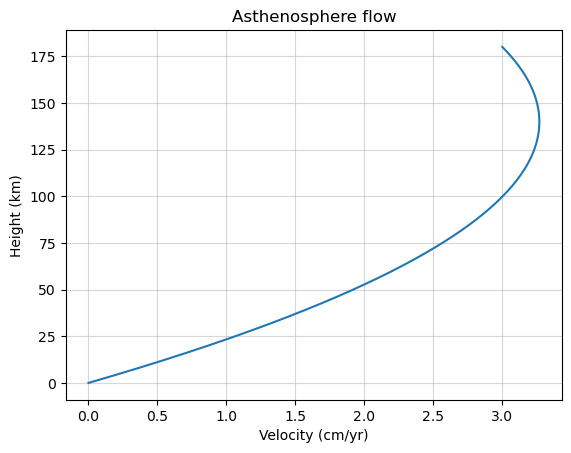

In [4]:
# To set the basic figure, labels and grid
fig, ax = plt.subplots() 
ax.set(xlabel='Velocity (cm/yr)', ylabel='Height (km)', title='Asthenosphere flow')
ax.grid(alpha=0.5)

y_array = np.linspace(0, H_a, 1000)   # To create an array of 1000 y-values from 0 to H_a
x_array = velocity(y_array, v_p, H_a, rho_c, h, mu, L)


ax.plot(x_array, y_array/1e3, label='Total flow')       # To plot velocity [cm/yr] vs height [km]

#### Question 3: Plot the *Couette* velocity profile

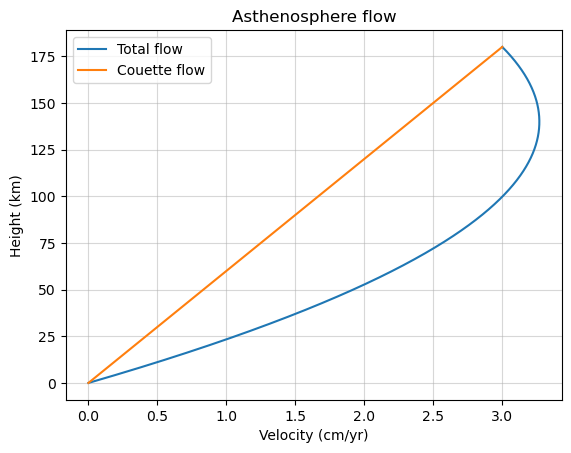

In [5]:
def couette_flow(y, v_p, H_a):
    vel_m_s = v_p/H_a * y
    return vel_m_s * (3600 * 24 * 365 * 100)    # To return velocity in units cm/yr


# To re-use the figure created above (ax), and plot the Couette flow on it
ax.plot(couette_flow(y_array, v_p, H_a), y_array/1e3, label='Couette flow')
ax.legend()
fig

#### Question 4: Plot the *Poiseuille* velocity profile

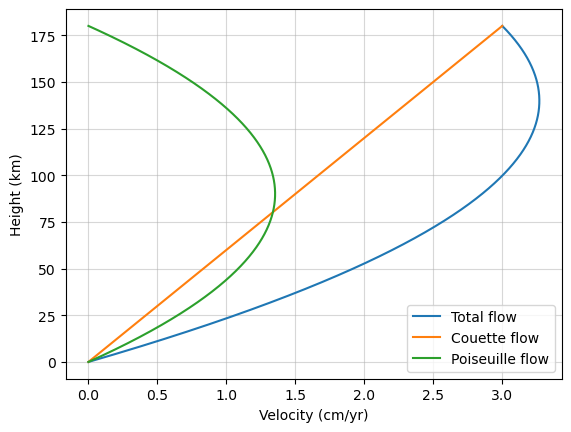

In [67]:
def poiseuille_flow(y, rho_c, g, h, mu_a, L, H_a):
    vel_m_s = (rho_c * g * h / (2 * mu_a * L))*(H_a - y)*y
    return vel_m_s * (3600 * 24 * 365 * 100)    # To return velocity in units cm/yr


ax.plot(poiseuille_flow(y_array, rho_c, g, h, mu, L, H_a), y_array/1e3, label='Poiseuille flow')
ax.legend()
fig

#### Question 5: Expression for the horizontal shear stress

In a newtonian viscous environment the stress relates linearly to the strain–rate through the viscosity. Since the strain–rate is a velocity gradient, the horizontal shear stress ($\tau$) is:

$$ \tau_x = 2\mu \cdot \frac{1}{2} \left( \frac{\delta v_x}{\delta y} \right)$$
$$ \tau_x = \mu \cdot \frac{\delta v_x}{\delta y} $$

Based on the result for Question 1, the expression for the horizontal shear stress is:

$$ \tau_x = \mu \left( \frac{1}{\mu} \frac{dp}{dx} y + \frac{v_p}{H_a} - \frac{1}{2\mu} \frac{dp}{dx} H_a \right) $$
$$ \tau_x = \mu \left( \frac{- \rho g h}{\mu L} y + \frac{v_p}{H_a} - \frac{- \rho g h}{2\mu L} H_a \right) $$ 
$$ \tau_x = \frac{\mu \cdot v_p}{H_a} + \frac{\rho g h}{2\mu L}  \left( H_a - 2y \right) $$

Note again here how also the shear stress is in general the summation of two components, one obtained from the *Couette*
case, the other from the *Poiseuille* case.